Spotify Database ( Predicting Song's genre using Machine Learning )
 

In [76]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#Model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import precision_score, recall_score,f1_score


In [7]:
data = pd.read_csv(r"C:\Users\sriram\Downloads\genres_v2.csv")

C:\Users\sriram\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [9]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [11]:
data.shape

(42305, 22)

In [13]:
data.head(5).T

,0,1,2,3,4
danceability,0.831,0.719,0.85,0.476,0.798
energy,0.814,0.493,0.893,0.781,0.624
key,2,8,5,0,2
loudness,-7.364,-7.23,-4.783,-4.71,-7.668
mode,1,1,1,1,1
speechiness,0.42,0.0794,0.0623,0.103,0.293
acousticness,0.0598,0.401,0.0138,0.0237,0.217
instrumentalness,0.0134,0,4.14e-06,0,0
liveness,0.0556,0.118,0.372,0.114,0.166
valence,0.389,0.124,0.0391,0.175,0.591


In [21]:
data['genre'].value_counts().to_frame()

,genre
Underground Rap,5875
Dark Trap,4578
Hiphop,3028
trance,2999
trap,2987
techhouse,2975
dnb,2966
psytrance,2961
techno,2956
hardstyle,2936


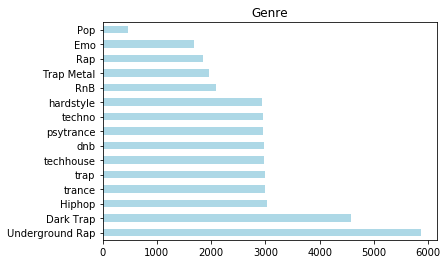

In [22]:
data['genre'].value_counts().plot(kind = 'barh' , color = ['lightblue'] , title = 'Genre')

In [26]:
data.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [29]:
data.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
genre                object
song_name            object
Unnamed: 0          float64
title                object
dtype: object

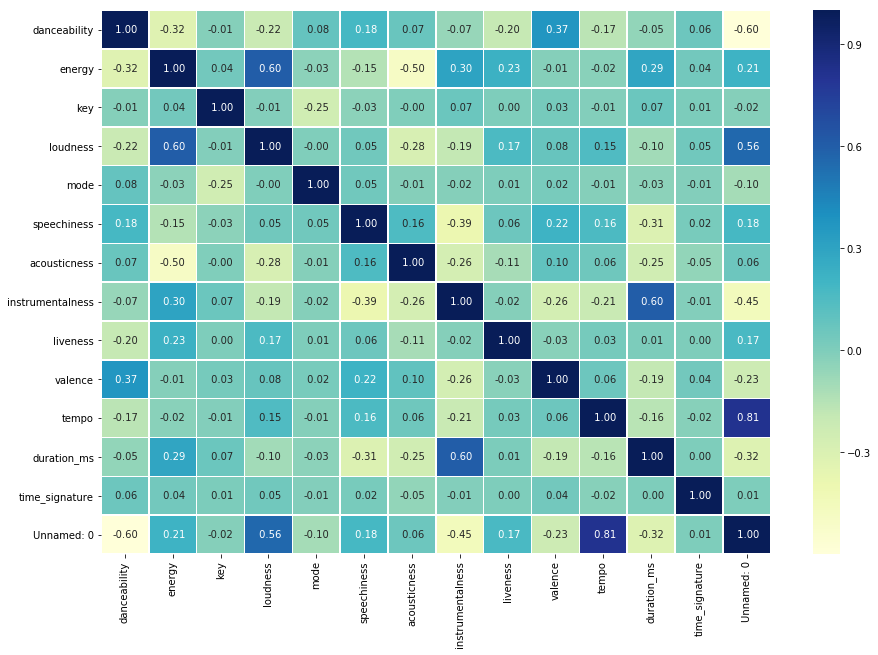

In [31]:
#Analysis using Seaborn heatmap for data analysis

corr_matrix = data.corr()
fig,ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix , annot = True , linewidths = 0.5 , fmt = " .2f", cmap = "YlGnBu");

# Understanding the Data Modelling

Here we split the data into X and Y 

In [34]:
num_data = data.drop(["title" , 'Unnamed: 0' , 'song_name' ,'analysis_url' , 'track_href' , 'uri' , 'id' , 'type'], axis =1)

In [37]:
X = num_data.drop('genre' , axis = 1)
y = num_data['genre']

In [38]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state =1)

Here we will use 3 different models for this problem 

1. Logistic Regression
2. K-Nearest 
3. Random Forest

In [40]:
models = {"LogReg" : LogisticRegression(),
           "KNN" : KNeighborsClassifier(),
         "Random Forest" : RandomForestClassifier()}

def fit_and_score (models , X_train , X_test , y_train , y_test):
    
    #Fits and evaluates given machine learning models
    
    np.random.seed(1)
    model_scores = {}
    for name , model in models.items():
        model.fit(X_train , y_train)
        model_scores[name] = model.score(X_test , y_test)
    return model_scores
    

In [44]:
model_scores = fit_and_score(models = models , X_train = X_train , X_test = X_test , y_train = y_train , y_test =y_test)
model_scores

C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'LogReg': 0.24618839380687862,
 'KNN': 0.31107434109443327,
 'Random Forest': 0.6414135444982862}

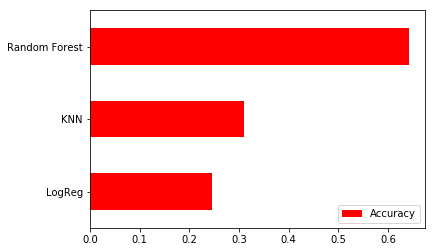

In [47]:
model_compare = pd.DataFrame(model_scores , index = ["Accuracy"])
model_compare.T.plot.barh(color = ["red"]);

In [50]:
model_compare

,LogReg,KNN,Random Forest
Accuracy,0.246188,0.311074,0.641414


Hyperparameter tuning for KNN manually

In [52]:
#Tuning for KNN model

train_scores = []
test_scores = []

neighbors =  range (1,15)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train , y_train)
    train_scores.append(knn.score(X_train , y_train))
    test_scores.append(knn.score(X_test , y_test))
    

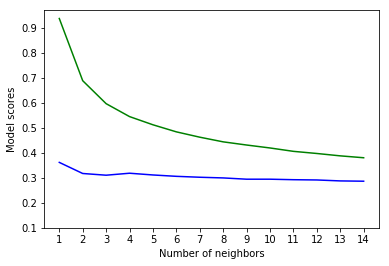

In [57]:
plt.plot(neighbors, train_scores , label ="Train scores" , color = 'green')
plt.plot(neighbors , test_scores , label ="Test scores" , color = 'blue')
plt.xticks(np.arange(1,15,1))
plt.yticks(np.arange(0.1,1,0.1))
plt.xlabel ("Number of neighbors")
plt.ylabel("Model scores")
plt.legend;

The above chart shows the best K-value giving higher prediction is 1 , where we observed an accuracy level of 36% which is low , for the case of other models , lets see whether we can improve the accuracy level.

In this code , lets analyze the case for logreg , RandomForest models

In [59]:
log_reg_grid = {"C" : np.logspace(-4,4,20) , "solver" : ["liblinear"]}
rf_grid = {"n_estimatrs" : np.arange(10,1000,50),
          "max_depth" : [None , 3 , 5 , 10],
          "min_samples_split" : np.arange(2,20,2),
          "min_samples_leaf" : np.arange(1,20,2)}

In [60]:
#Tune LogReg model
np.random.seed(1)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)

In [61]:
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence

C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\si

C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sriram\Anaconda3\lib\si

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]), 'solver': ['liblinear']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=True)

In [62]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.0006951927961775605}

In [63]:
rs_log_reg.score(X_test, y_test)

0.24630658314620021

The observed accuracy is quite low , let's compare the same using Random Forest and observe how it scores.

In [85]:
#Tune Random Forest model
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        n_iter=20, cv =5,
                        verbose=True)
